In [31]:
import plotly.express as px
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import plotnine as p9
df = pd.read_csv("exercise.csv")
df.head()

,y,x1,x2
0,15.68,6.87,14.09
1,6.18,4.40,4.35
2,18.10,0.43,18.09
3,9.07,2.73,8.65
4,17.97,3.25,17.68


In [55]:
#Tworze dwie zmienne przechowujące znane i nieznane dane 

known_y = df[:40]
unknown_y = df[40:60]

In [56]:
#Rysuję dwa wykresy - po jednym dla x1 i x2

fig = px.scatter(df, x="x1", y="y",height=400, title="Wykres punktowy X1")
fig.show()

fig = px.scatter(df, x="x2", y="y",height=400, title="Wykres punktowy X2")
fig.show()

In [43]:
model = smf.ols('y ~ x1+x2', data=known_y).fit()
coefs = res.params
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     652.4
Date:                Fri, 13 Dec 2019   Prob (F-statistic):           1.41e-29
Time:                        10:52:23   Log-Likelihood:                -50.985
No. Observations:                  40   AIC:                             108.0
Df Residuals:                      37   BIC:                             113.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3151      0.388      3.392      0.002       0.530       2.101
x1             0.5148      0.046     11.216      0.000       0.422       0.608
x2             0.8069      0.024     33.148      0.000       0.758       0.856
==============================================================================
Omnibus:                       14.478   Durbin-Watson:                   2.509
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.393
Skew:                           1.341   Prob(JB):                     0.000454
Kurtosis:                       4.428   Cond. No.                         38.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
known_y['y_pred']=model.predict()
known_y['residuals']=known_y['y']-known_y['y_pred']

D:\Programy\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

D:\Programy\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



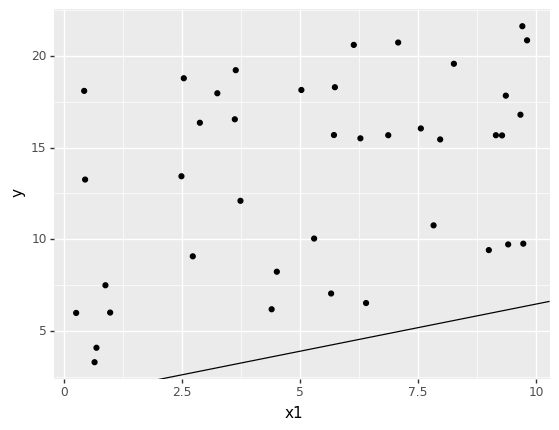

<ggplot: (-9223371912354527088)>

In [45]:
wykres1 = (p9.ggplot(p9.aes(x='x1',y='y'),data=known_y)
      +p9.geom_point()
      +p9.geom_abline(p9.aes(intercept=coefs['Intercept'],slope=coefs['x1'])))
wykres1

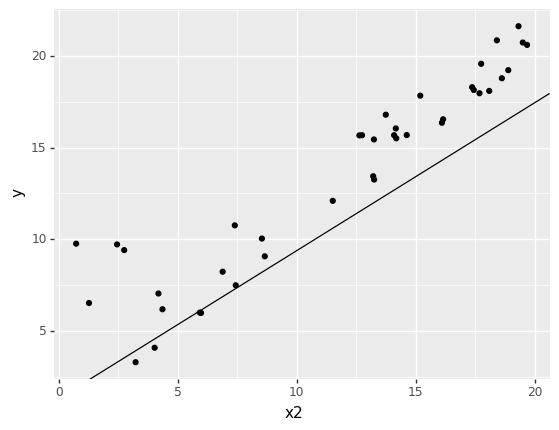

<ggplot: (-9223371912355057528)>

In [44]:
wykres2 = (p9.ggplot(p9.aes(x='x2',y='y'),data=known_y)
      +p9.geom_point()
      +p9.geom_abline(p9.aes(intercept=coefs['Intercept'],slope=coefs['x2'])))
wykres2

In [46]:
print("Na wykresach można dostrzeć, iż zmienna x2 wykazuje większą korelację z y niż zmienna x1")

Na wykresach można dostrzeć, iż zmienna x2 wykazuje większą korelację z y niż zmienna x1


Wykres resiuów


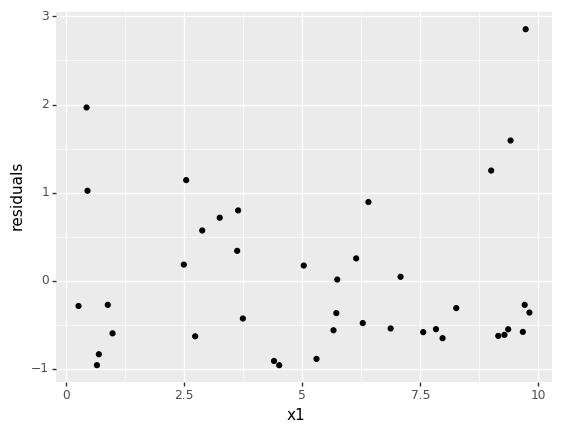

<ggplot: (-9223371912362520728)>

In [51]:
print("Wykres resiuów")
wyk = (p9.ggplot(p9.aes(x='x1',y='residuals'),data=known_y)
      +p9.geom_point())
wyk

In [57]:
unknown_y

,y,x1,x2
40,NaN,9.87,10.43
41,NaN,9.99,15.72
42,NaN,8.39,0.35
43,NaN,0.80,10.91
44,NaN,9.58,15.82
45,NaN,4.82,11.90
46,NaN,2.97,2.46
47,NaN,8.80,4.09
48,NaN,6.07,1.80
49,NaN,0.19,13.54


In [69]:
predict_y = []
for row in unknown_y:
    predict_y = (coefs['Intercept'] + coefs['x1']*unknown_y['x1'] + coefs['x2']*unknown_y['x2'])
unknown_y["predict_y"] = predict_y
unknown_y


D:\Programy\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,y,x1,x2,predict_y
40,NaN,9.87,10.43,14.812484
41,NaN,9.99,15.72,19.142865
42,NaN,8.39,0.35,5.916816
43,NaN,0.80,10.91,10.530475
44,NaN,9.58,15.82,19.012485
45,NaN,4.82,11.90,13.398863
46,NaN,2.97,2.46,4.829144
47,NaN,8.80,4.09,9.145767
48,NaN,6.07,1.80,5.892489
49,NaN,0.19,13.54,12.338639


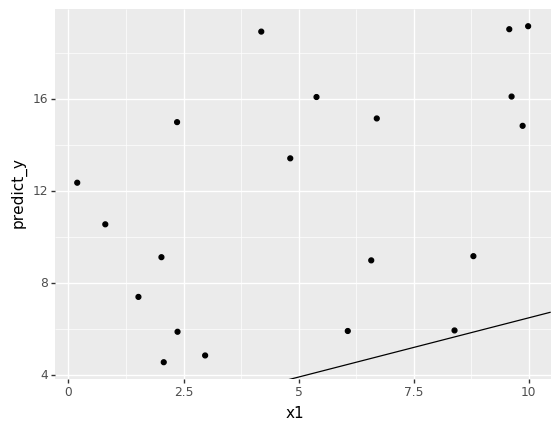

<ggplot: (-9223371912351880052)>

In [71]:
wykres3 = (p9.ggplot(p9.aes(x='x1',y='predict_y'),data=unknown_y)
      +p9.geom_point()
      +p9.geom_abline(p9.aes(intercept=coefs['Intercept'],slope=coefs['x1'])))
wykres3

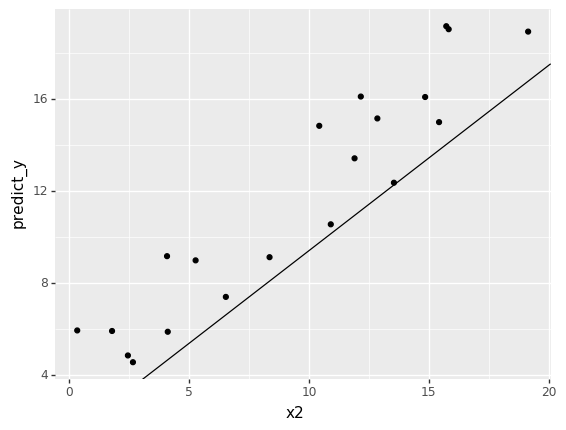

<ggplot: (-9223371912351881088)>

In [72]:
wykres3 = (p9.ggplot(p9.aes(x='x2',y='predict_y'),data=unknown_y)
      +p9.geom_point()
      +p9.geom_abline(p9.aes(intercept=coefs['Intercept'],slope=coefs['x2'])))
wykres3

In [ ]:
print('Dostrzec można, iż lepiej przewidywać kolejne punkty na podstawie zmiennej x2 - daje to lepsze rezultaty')